## Import

In [745]:
import pandas as pd
import nltk
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

from keras.layers import Dropout

## Data Import / preprocess

In [192]:
df = pd.read_csv('text_emotion.csv')

In [193]:
df.head(5)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [194]:
#define stopwords and vectorizer
#stopwords = nltk.corpus.stopwords.words('english')
vectoriser = CountVectorizer()

In [344]:
#define x,y and clean data
xT = df["content"]
yY = df["sentiment"]

In [345]:
vectoriser.fit(x)

CountVectorizer()

In [197]:
vectoriser.vocabulary_

{'tiffanylue': 42934,
 'know': 24017,
 'was': 45848,
 'listenin': 25463,
 'to': 43187,
 'bad': 4919,
 'habit': 18430,
 'earlier': 13732,
 'and': 3374,
 'started': 40270,
 'freakin': 16431,
 'at': 4404,
 'his': 19455,
 'part': 32220,
 'layin': 24765,
 'bed': 5497,
 'with': 46653,
 'headache': 18934,
 'ughhhh': 44484,
 'waitin': 45698,
 'on': 31419,
 'your': 47769,
 'call': 7788,
 'funeral': 16733,
 'ceremony': 8464,
 'gloomy': 17579,
 'friday': 16548,
 'wants': 45794,
 'hang': 18641,
 'out': 31753,
 'friends': 16566,
 'soon': 39574,
 'dannycastillo': 11398,
 'we': 45961,
 'want': 45789,
 'trade': 43584,
 'someone': 39510,
 'who': 46377,
 'has': 18796,
 'houston': 19873,
 'tickets': 42894,
 'but': 7511,
 'no': 30630,
 'one': 31425,
 'will': 46516,
 're': 34989,
 'pinging': 33045,
 'ghostridah14': 17347,
 'why': 46439,
 'didn': 12409,
 'you': 47742,
 'go': 17634,
 'prom': 34089,
 'bc': 5329,
 'my': 29586,
 'bf': 5816,
 'like': 25240,
 'should': 38404,
 'be': 5353,
 'sleep': 39005,
 'im': 

In [343]:
vectoriser.transform(x).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [802]:
X = df['content'].values
y = df['sentiment'].values

In [803]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [707]:
vectoriser.fit(X_train)

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_train

<30000x39357 sparse matrix of type '<class 'numpy.int64'>'
	with 356918 stored elements in Compressed Sparse Row format>

Pour le premier test, nous allons utilisé un Dataset avec lequel nous obtenions des résultats plutot bas, nous allons voir si nous pouvons augmenter cela avec Keras.

Nous avont déja beaucoup étudié et analyser ce dataset dans un précedent brief et nous savont d'entré que trés peu de données sont corréler.

## LogRegression

In [684]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.3413


/Users/buu/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Dans un premier temps mettons en mémoire les résultat avec la Logistic Regression de SKLearn
On voit que les données sont très complexe et qu'il a du mal a les classifier correctement

## Keras

In [708]:
input_dim = X_train.shape[1]
print(input_dim)
# Number of features

model = Sequential()
model.add(layers.Dense(250, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.9))

model.add(layers.Dense(13, activation='softmax'))

39357


Créons notre premier modèle basic en spécifiant le nombre de class 13, fixons le nombre de neurones a 10 

In [709]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 250)               9839500   
_________________________________________________________________
dropout_70 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_223 (Dense)            (None, 13)                3263      
Total params: 9,842,763
Trainable params: 9,842,763
Non-trainable params: 0
_________________________________________________________________


Nous étudions un cas de multi classification sur des données en matrix sparce, pour selon nous devont configuré le loss a **'sparse_categorical_crossentropy'**, si nous avions eu des données binaire il aurait fallut **'binary_crossentropy'**

Ensuite nous allons encoder car Keras ne prend pas en charge les string en temps que label, on va donc utiliser LabelEncoder afin d'unifier les données en integer

In [710]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [711]:
print(y_train[:3])

[ 8 10  5]


In [712]:
history = model.fit(X_train, y_train, epochs=25,verbose=2, validation_data=(X_test, y_test),batch_size=1000)

Epoch 1/25
30/30 - 1s - loss: 2.3441 - accuracy: 0.2228 - val_loss: 2.1600 - val_accuracy: 0.2965
Epoch 2/25
30/30 - 1s - loss: 2.1254 - accuracy: 0.3017 - val_loss: 2.0624 - val_accuracy: 0.3309
Epoch 3/25
30/30 - 1s - loss: 2.0057 - accuracy: 0.3493 - val_loss: 1.9970 - val_accuracy: 0.3411
Epoch 4/25
30/30 - 1s - loss: 1.9025 - accuracy: 0.3830 - val_loss: 1.9543 - val_accuracy: 0.3472
Epoch 5/25
30/30 - 1s - loss: 1.8129 - accuracy: 0.4086 - val_loss: 1.9275 - val_accuracy: 0.3529
Epoch 6/25
30/30 - 1s - loss: 1.7393 - accuracy: 0.4306 - val_loss: 1.9127 - val_accuracy: 0.3600
Epoch 7/25
30/30 - 1s - loss: 1.6673 - accuracy: 0.4617 - val_loss: 1.9058 - val_accuracy: 0.3613
Epoch 8/25
30/30 - 1s - loss: 1.6007 - accuracy: 0.4866 - val_loss: 1.9042 - val_accuracy: 0.3622
Epoch 9/25
30/30 - 1s - loss: 1.5207 - accuracy: 0.5150 - val_loss: 1.9088 - val_accuracy: 0.3641
Epoch 10/25
30/30 - 1s - loss: 1.4553 - accuracy: 0.5359 - val_loss: 1.9175 - val_accuracy: 0.3613
Epoch 11/25
30/30 -

In [452]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.6769
Testing Accuracy:  0.3622


In [453]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

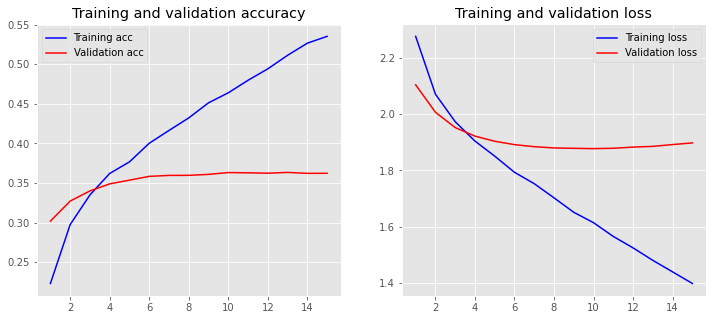

In [454]:
plot_history(history)

## Using Pretrained Word Embeddings

### One-Hot Encoding

In [806]:
from keras.preprocessing.text import Tokenizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X[2])
print(X_train[2])

Funeral ceremony...gloomy friday...
[4, 128, 983, 133]


In [807]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Les sequences finales sont crée

In [808]:
print(X_train[0, :])

[4327   58  609    2  964    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


### Keras Embedding Layer

In [816]:

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.9))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 100, 100)          4001100   
_________________________________________________________________
flatten_13 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_238 (Dense)            (None, 250)               2500250   
_________________________________________________________________
dropout_73 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_239 (Dense)            (None, 13)                3263      
Total params: 6,504,613
Trainable params: 6,504,613
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
60/60 [==============================] - 4s 59ms/step - loss: 2.3725 - accuracy: 0.1810 - val_loss: 2.1695 - val_accuracy: 0.2470
Epoch 2/15
60/60 [==============================] - 3s 53ms/step - loss: 2.2248 - accuracy: 0.2259 - val_loss: 2.1344 - val_accuracy: 0.2615
Epoch 3/15
60/60 [==============================] - 3s 54ms/step - loss: 2.1889 - accuracy: 0.2374 - val_loss: 2.1173 - val_accuracy: 0.2748
Epoch 4/15
60/60 [==============================] - 4s 60ms/step - loss: 2.1470 - accuracy: 0.2540 - val_loss: 2.0757 - val_accuracy: 0.2811
Epoch 5/15
60/60 [==============================] - 4s 60ms/step - loss: 2.0820 - accuracy: 0.2749 - val_loss: 2.0298 - val_accuracy: 0.3068
Epoch 6/15
60/60 [==============================] - 3s 58ms/step - loss: 1.9838 - accuracy: 0.3115 - val_loss: 1.9930 - val_accuracy: 0.3296
Epoch 7/15
60/60 [==============================] - 4s 59ms/step - loss: 1.8917 - accuracy: 0.3480 - val_loss: 1.9703 - val_accuracy: 0.3293
Epoch 8/15
60

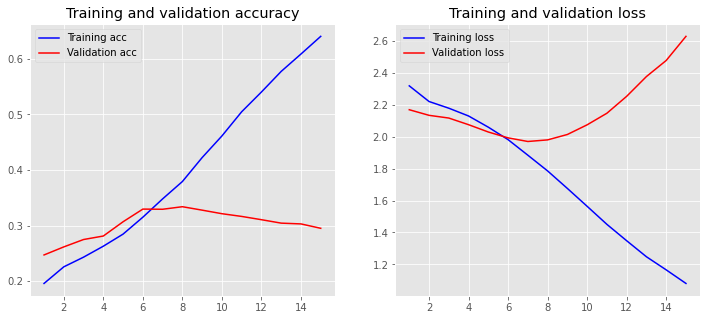

In [817]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=500)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Epoch 1/8
938/938 [==============================] - 9s 9ms/step - loss: 2.2709 - accuracy: 0.2110 - val_loss: 2.0503 - val_accuracy: 0.3014
Epoch 2/8
938/938 [==============================] - 9s 10ms/step - loss: 2.0525 - accuracy: 0.2990 - val_loss: 1.9505 - val_accuracy: 0.3380
Epoch 3/8
938/938 [==============================] - 8s 9ms/step - loss: 1.9381 - accuracy: 0.3435 - val_loss: 1.9182 - val_accuracy: 0.3453
Epoch 4/8
938/938 [==============================] - 8s 8ms/step - loss: 1.8628 - accuracy: 0.3683 - val_loss: 1.9124 - val_accuracy: 0.3429
Epoch 5/8
938/938 [==============================] - 8s 9ms/step - loss: 1.7961 - accuracy: 0.3935 - val_loss: 1.9207 - val_accuracy: 0.3416
Epoch 6/8
938/938 [==============================] - 9s 9ms/step - loss: 1.7450 - accuracy: 0.4111 - val_loss: 1.9397 - val_accuracy: 0.3371
Epoch 7/8
938/938 [==============================] - 8s 9ms/step - loss: 1.6948 - accuracy: 0.4288 - val_loss: 1.9770 - val_accuracy: 0.3349
Epoch 8/8
93

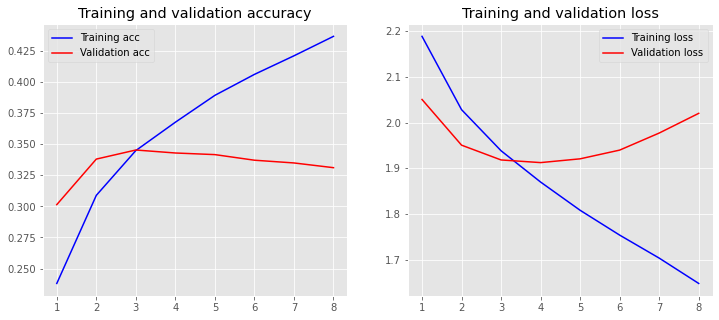

In [509]:
history = model.fit(X_train, y_train,
                    epochs=8,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Convolutional Neural Networks (CNN)

In [393]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          4001100   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 250)               32250     
_________________________________________________________________
dropout_13 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 13)                3263      
Total params: 4,100,741
Trainable params: 4,100,741
Non-trainable params: 0
___________________________________________

Epoch 1/5
3000/3000 [==============================] - 63s 21ms/step - loss: 2.1660 - accuracy: 0.2515 - val_loss: 1.9437 - val_accuracy: 0.3329
Epoch 2/5
3000/3000 [==============================] - 61s 20ms/step - loss: 1.9093 - accuracy: 0.3578 - val_loss: 1.9127 - val_accuracy: 0.3447
Epoch 3/5
3000/3000 [==============================] - 62s 21ms/step - loss: 1.7587 - accuracy: 0.3999 - val_loss: 1.9669 - val_accuracy: 0.3346
Epoch 4/5
3000/3000 [==============================] - 66s 22ms/step - loss: 1.5902 - accuracy: 0.4499 - val_loss: 2.0495 - val_accuracy: 0.3378
Epoch 5/5
3000/3000 [==============================] - 62s 21ms/step - loss: 1.4074 - accuracy: 0.5092 - val_loss: 2.2524 - val_accuracy: 0.3248
Training Accuracy: 0.6024
Testing Accuracy:  0.3248


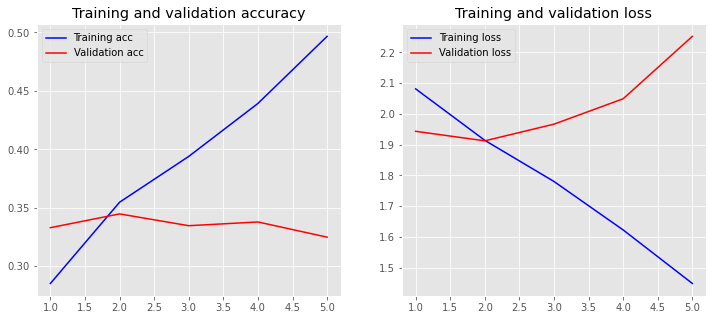

In [394]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Test on another dataset